# CONTENTS

- IMPORTING DATA
- EXPLORING DATA
- GEOGRAPHIC SEGMENTATION ANALYSIS
- OPTIMIZING CUSTOMER SEGMENTATION
- CUSTOMER PROFILING
- CONSUMER PREFERENCES BY DEPARTMENT
- ORDERING HABITS BY LOYALTY STATUS
- EXPORTING DATA

# IMPORTING DATA

In [1]:
# import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# initialize path variable
path = r'/Users/smac_/Documents/Courses/CF Data Analytics Program/Data Immersion/Achievement 4/05-2023 Instacart Basket Analysis'

In [3]:
# import data
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'f_orders_products_all.pkl'))
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'a_departments_wrangled.csv'), index_col = False)

# EXPLORING DATA

## MAIN DATAFRAME

In [4]:
# column names & data types
ords_prods_all.dtypes

order_id                   object
user_id                    object
order_number                int64
orders_day_of_week          int64
order_hour_of_day           int64
days_since_prior_order    float64
product_id                 object
add_to_cart_order           int64
reordered                  object
product_name               object
aisle_id                   object
department_id              object
prices                    float64
price_range                object
busiest_day                object
busiest_days               object
busiest_period_of_day      object
max_order                   int64
loyalty_flag               object
mean_spending             float64
spending_flag              object
median_frequency          float64
frequency_flag             object
gender                     object
state                      object
age                         int64
date_joined                object
dependants                  int64
marital_status             object
income        

In [5]:
# first 5 rows
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_frequency,frequency_flag,gender,state,age,date_joined,dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423


In [6]:
# last 5 rows
ords_prods_all.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,spending_flag,median_frequency,frequency_flag,gender,state,age,date_joined,dependants,marital_status,income
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,High spender,7.0,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151
32404858,2922475,66343,4,1,12,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Low spender,30.0,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151


In [7]:
# dataframe size
ords_prods_all.shape

(32404859, 30)

## DEPARTMENTS DATAFRAME

In [8]:
# column names & data types
df_depts.dtypes

Unnamed: 0     int64
department    object
dtype: object

In [9]:
# all rows
df_depts.head(21)

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [10]:
# dataframe size
df_depts.shape

(21, 2)

In [11]:
# rename 'unnamed: 0' column
df_depts.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [12]:
# all rows
df_depts.head(21)

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### DERIVE `'department'` COLUMN

In [13]:
# cast 'department_id' in 'ords_prods_all' as integer
ords_prods_all['department_id'] = ords_prods_all['department_id'].astype(int)

In [14]:
# cast 'department_id' in 'df_depts' dataframe as integer
df_depts['department_id'] = df_depts['department_id'].astype(int)

In [15]:
# generate data dictionary storing values in 'df_depts'
dept_dict = dict(zip(df_depts['department_id'], df_depts['department']))
dept_dict

{1: 'frozen',
 2: 'other',
 3: 'bakery',
 4: 'produce',
 5: 'alcohol',
 6: 'international',
 7: 'beverages',
 8: 'pets',
 9: 'dry goods pasta',
 10: 'bulk',
 11: 'personal care',
 12: 'meat seafood',
 13: 'pantry',
 14: 'breakfast',
 15: 'canned goods',
 16: 'dairy eggs',
 17: 'household',
 18: 'babies',
 19: 'snacks',
 20: 'deli',
 21: 'missing'}

In [16]:
# map department name as new column in dataframe using dictionary
ords_prods_all['department'] = ords_prods_all['department_id'].map(dept_dict)

In [17]:
# dataframe size
ords_prods_all.shape

(32404859, 31)

# GEOGRAPHIC SEGMENTATION ANALYSIS

## DERIVE `'region'` COLUMN

In [18]:
# unique values in 'state'
ords_prods_all['state'].unique()

array(['Alabama', 'Indiana', 'Louisiana', 'Montana', 'Oklahoma',
       'Tennessee', 'Iowa', 'Ohio', 'Virginia', 'Connecticut', 'Kentucky',
       'Oregon', 'South Dakota', 'Michigan', 'New Jersey', 'Arizona',
       'Maine', 'Hawaii', 'Minnesota', 'Illinois', 'Idaho', 'Kansas',
       'North Carolina', 'Vermont', 'Alaska', 'Delaware', 'Maryland',
       'Nebraska', 'Nevada', 'Arkansas', 'Georgia',
       'District of Columbia', 'Utah', 'Colorado', 'Florida',
       'South Carolina', 'Rhode Island', 'Washington', 'California',
       'Mississippi', 'Texas', 'New Mexico', 'Missouri', 'Wyoming',
       'New Hampshire', 'Massachusetts', 'Pennsylvania', 'Wisconsin',
       'West Virginia', 'North Dakota', 'New York'], dtype=object)

In [19]:
# assign labels to values in 'state' & store them in list 'reg_result'
reg_result = []

for i in ords_prods_all['state']:
    if i in ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania']:
        reg_result.append('Northeast')
    elif i in ['Indiana', 'Illinois', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota', 'Missouri', 'Nebraska', 'North Dakota', 'South Dakota']:
        reg_result.append('Midwest')
    elif i in ['Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee', 'Arkansas', 'Louisiana', 'Oklahoma', 'Texas']:
        reg_result.append('South')
    else:
        reg_result.append('West')

In [20]:
# total rows in dataframe
len(ords_prods_all)

32404859

In [21]:
# total values in 'reg_result' list
len(reg_result)

32404859

In [22]:
# add values in 'reg_result' list to dataframe as new column
ords_prods_all['region'] = reg_result

In [23]:
# frequency counts in 'region'
ords_prods_all['region'].value_counts()

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [24]:
# first 5 rows
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,gender,state,age,date_joined,dependants,marital_status,income,department,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South


## REGIONAL SPENDING HABITS

In [25]:
# create a crosstab with 'region' & 'spending_flag' columns
crosstab_reg_spending = pd.crosstab(index = ords_prods_all['region'], columns = ords_prods_all['spending_flag'], normalize = 'index')
crosstab_reg_spending

spending_flag,High spender,Low spender
region,,
Midwest,0.003852,0.996148
Northeast,0.003258,0.996742
South,0.003760,0.996240
West,0.003765,0.996235


([<matplotlib.axis.XTick at 0x2d1db5e40>,
 [Text(0.0, 0, '0%'),
  Text(0.2, 0, '20%'),
  Text(0.4, 0, '40%'),
  Text(0.6, 0, '60%'),
  Text(0.8, 0, '80%'),
  Text(1.0, 0, '100%')])

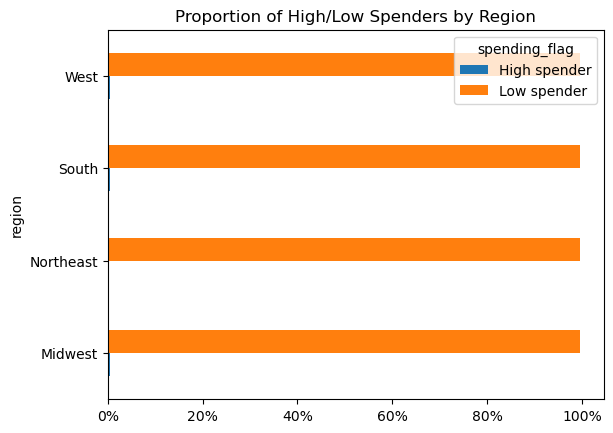

In [26]:
# generate stacked bar chart based on frequency counts in 'spending_flag' grouped by 'region'
bar_reg_spending = crosstab_reg_spending.plot(kind = 'barh')
plt.title('Proportion of High/Low Spenders by Region')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

In [27]:
# export chart
bar_reg_spending.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_reg_spending.png'), bbox_inches = 'tight')

## REGIONAL ORDERING HABITS

In [28]:
# generate crosstab between 'department' & 'region'
dept_region_crosstab = pd.crosstab(index = ords_prods_all['department'], columns = ords_prods_all['region'], normalize = 'index')
dept_region_crosstab

region,Midwest,Northeast,South,West
department,,,,
alcohol,0.235439,0.172692,0.335884,0.255986
babies,0.233560,0.177297,0.338965,0.250178
bakery,0.233591,0.177921,0.331632,0.256856
beverages,0.232718,0.179835,0.334412,0.253036
breakfast,0.232636,0.175773,0.333201,0.258390
bulk,0.236977,0.167819,0.333584,0.261620
canned goods,0.234727,0.174855,0.333329,0.257089
dairy eggs,0.234170,0.176712,0.332849,0.256269
deli,0.233701,0.177710,0.332385,0.256205


([<matplotlib.axis.XTick at 0x2d1f220b0>,
 [Text(0.0, 0, '0%'),
  Text(0.2, 0, '20%'),
  Text(0.4, 0, '40%'),
  Text(0.6, 0, '60%'),
  Text(0.8, 0, '80%'),
  Text(1.0, 0, '100%')])

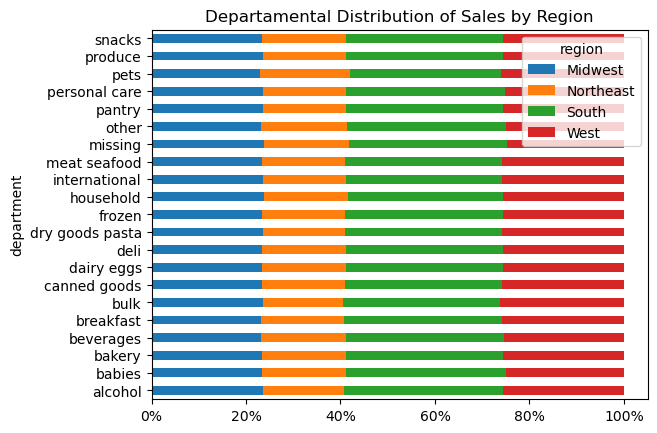

In [29]:
# generate stacked bar chart based on frequency counts in 'department' grouped by region
bar_dept_region = dept_region_crosstab.plot(kind = 'barh', stacked= True)
plt.title('Departamental Distribution of Sales by Region')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

In [30]:
# export chart
bar_dept_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_region.png'), bbox_inches = 'tight')

# OPTIMIZING CUSTOMER SEGMENTATION

## DERIVE EXCLUSION FLAG FOR LOW ACTIVITY CUSTOMERS

In [31]:
# assign labels for values in 'max_order' & store them in list 'ex_cust'
ex_cust = []

for i in ords_prods_all['max_order']:
    if i < 5:
        ex_cust.append('Low activity')
    else:
        ex_cust.append('Recurrent activity')

In [32]:
# add values in 'ex_cust' list to dataframe as new column
ords_prods_all['exclusion_flag'] = ex_cust

In [33]:
# frequency counts in 'exclusion_flag'
ords_prods_all['exclusion_flag'].value_counts()

Recurrent activity    30964564
Low activity           1440295
Name: exclusion_flag, dtype: int64

In [34]:
# first 5 rows
ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,dependants,marital_status,income,department,region,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Recurrent activity
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Recurrent activity
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Recurrent activity
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Recurrent activity
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,beverages,South,Recurrent activity


In [35]:
# initialize subset dataframe excluding 'Low activity' customers
ords_prods_all_recur_act = ords_prods_all[ords_prods_all['exclusion_flag'] == 'Recurrent activity']

In [36]:
# subset dataframe size
ords_prods_all_recur_act.shape

(30964564, 33)

# CUSTOMER PROFILING

In [37]:
# generate crosstab between 'department_id' & 'user_id'
user_dept_crosstab = pd.crosstab(ords_prods_all['department_id'], ords_prods_all['user_id'])
user_dept_crosstab

user_id,1,10,100,1000,10000,100000,100001,100002,100003,100004,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,3,5,56,0,16,7,3,0,...,13,16,4,9,12,7,51,4,2,9
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,2,1,56,8,17,1,2,0,...,1,0,2,4,7,2,4,3,0,7
4,5,72,10,34,340,51,393,0,10,0,...,196,78,4,22,68,10,20,10,14,129
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
6,0,1,0,0,2,1,24,0,0,0,...,0,1,2,0,0,0,1,2,0,1
7,13,0,0,19,36,1,55,2,3,14,...,0,3,10,25,13,3,6,2,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,38,1,9,0,1,4,...,2,4,8,0,1,2,0,2,0,37


## AGE

### CRITERIA

- If `'age'` is between 18 & 25, label customer as "Young adult".
- If `'age'` is between 26 & 45, label customer as "Middle-aged adult".
- If `'age'` is between 46 & 65, label customer as "Older adult".
- If `'age'` is greater than 65, label customer as "Senior citizen"

In [38]:
# 1st conditonal statement
ords_prods_all.loc[(ords_prods_all['age'] >= 18) & (ords_prods_all['age'] <= 25), 'age_profile'] = 'Young adult'

In [39]:
# 2nd conditional statement
ords_prods_all.loc[(ords_prods_all['age'] > 25) & (ords_prods_all['age'] <= 45), 'age_profile'] = 'Middle-aged adult'

In [40]:
# 3rd conditional statement
ords_prods_all.loc[(ords_prods_all['age'] > 45) & (ords_prods_all['age'] <= 65), 'age_profile'] = 'Older adult'

In [41]:
# 4th conditional statement
ords_prods_all.loc[ords_prods_all['age'] > 65, 'age_profile'] = 'Senior citizen'

In [42]:
# frequency counts in 'age_profile'
ords_prods_all['age_profile'].value_counts()

Middle-aged adult    10156136
Older adult          10115433
Senior citizen        8088101
Young adult           4045189
Name: age_profile, dtype: int64

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/3673543232.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(freq_age_profile_labels_x)


Text(0.5, 0, '# of Customers')

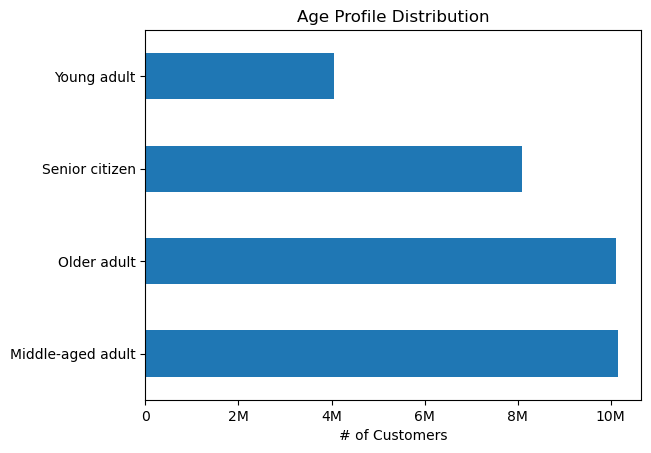

In [43]:
# generate a bar chart based on frequency counts in 'age_profile'
freq_age_profile = ords_prods_all['age_profile'].value_counts().plot.barh()
plt.title('Age Profile Distribution')
freq_age_profile_labels_x = ['0', '2M', '4M', '6M', '8M', '10M', '12M']
plt.gca().set_xticklabels(freq_age_profile_labels_x)
plt.xlabel('# of Customers')

In [44]:
# export chart
freq_age_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_age_profile.png'), bbox_inches = 'tight')

### USAGE FREQUENCY & EXPENDITURE

In [45]:
# summary stats for 'prices' & 'days_since_prior_order' grouped by 'age_profile'
ords_prods_all.groupby('age_profile').agg({'prices' : ['mean', 'min', 'max'],
                                              'days_since_prior_order' : ['mean', 'min', 'max']})

prices            days_since_prior_order           
                       mean  min   max                   mean  min   max
age_profile                                                             
Middle-aged adult  7.789808  1.0  25.0              11.115102  0.0  30.0
Older adult        7.791520  1.0  25.0              11.115945  0.0  30.0
Senior citizen     7.794233  1.0  25.0              11.080922  0.0  30.0
Young adult        7.785683  1.0  25.0              11.093030  0.0  30.0

### REGIONAL RELATIONSHIP

In [46]:
# generate crosstab between 'age_profile' & 'region'
age_region_crosstab = pd.crosstab(ords_prods_all['age_profile'], ords_prods_all['region'])
age_region_crosstab

region,Midwest,Northeast,South,West
age_profile,,,,
Middle-aged adult,2393362,1773892,3413511,2575371
Older adult,2382792,1778780,3332289,2621572
Senior citizen,1881637,1458952,2669420,2078092
Young adult,939534,711112,1376665,1017878


/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/2142050791.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bar_age_region_labels_x)


Text(0.5, 0, '# of Customers')

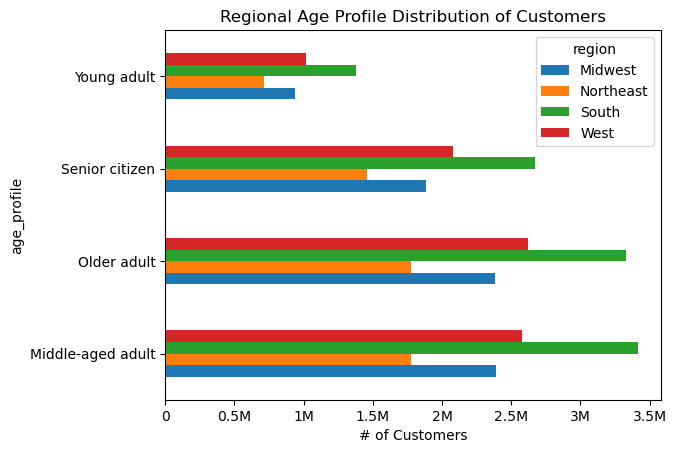

In [47]:
# generate bar chart based on frequency counts in 'age_profile' grouped by 'region'
bar_age_region = age_region_crosstab.plot.barh()
plt.title('Regional Age Profile Distribution of Customers')
bar_age_region_labels_x = ['0', '0.5M', '1M', '1.5M', '2M', '2.5M', '3M', '3.5M', '4M']
plt.gca().set_xticklabels(bar_age_region_labels_x)
plt.xlabel('# of Customers')

In [48]:
# export chart
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_age_region.png'), bbox_inches = 'tight')

### DEPARTAMENTAL RELATIONSHIP

In [49]:
# generate crosstab between 'department' & 'age_profile'
dept_age_crosstab = pd.crosstab(index = ords_prods_all['department'], columns = ords_prods_all['age_profile'], normalize = 'index')
dept_age_crosstab

age_profile,Middle-aged adult,Older adult,Senior citizen,Young adult
department,,,,
alcohol,0.314654,0.312149,0.240397,0.132801
babies,0.317910,0.313434,0.243571,0.125084
bakery,0.314327,0.312388,0.248393,0.124891
beverages,0.310236,0.314649,0.251205,0.123911
breakfast,0.312335,0.313453,0.246886,0.127325
bulk,0.312672,0.310416,0.249009,0.127903
canned goods,0.314178,0.311769,0.249070,0.124984
dairy eggs,0.315017,0.310702,0.249278,0.125003
deli,0.314258,0.312243,0.249361,0.124138


([<matplotlib.axis.XTick at 0x2d2158dc0>,
 [Text(0.0, 0, '0%'),
  Text(0.2, 0, '20%'),
  Text(0.4, 0, '40%'),
  Text(0.6, 0, '60%'),
  Text(0.8, 0, '80%'),
  Text(1.0, 0, '100%')])

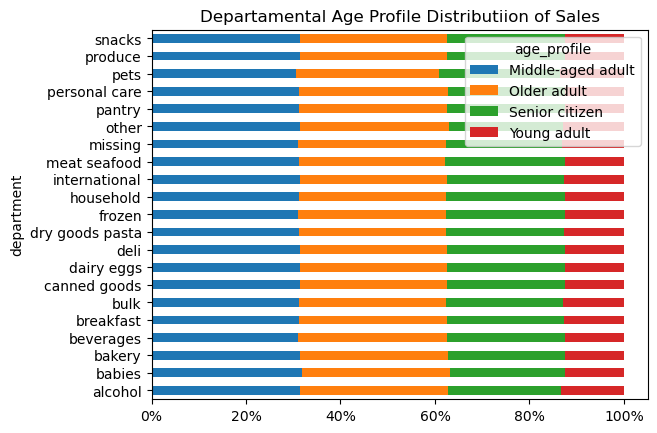

In [50]:
# generate stacked bar chart based on frequency counts in 'department' grouped by 'age_profile'
bar_dept_age = dept_age_crosstab.plot(kind = 'barh', stacked = True)
plt.title('Departamental Age Profile Distributiion of Sales')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

In [51]:
# export chart
bar_dept_age.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_age.png'), bbox_inches = 'tight')

## PARENTAL

### CRITERIA

- If `'age'` is 25 or less **AND** `'dependants'` is at least 1, label customer as "Young parent".
- If `'age'` is between 26-35 **AND** `'dependants'` is at least 1, label customer as "Middle-aged parent".
- If `'age'` is over 36 **AND** `'dependants'` is at least 1, label customer as "Old-Parent".
- If `'dependants'` is 0, label customer as "Childless".

In [52]:
# 1st conditional statement
ords_prods_all.loc[(ords_prods_all['age'] <= 25) & (ords_prods_all['dependants'] >= 1), 'parent_profile'] = 'Young parent'

In [53]:
# 2nd conditional statement
ords_prods_all.loc[(ords_prods_all['age'] >= 26) & (ords_prods_all['age'] <= 35) & (ords_prods_all['dependants'] >= 1), 'parent_profile'] = 'Middle-aged parent'

In [54]:
# 3rd conditional statement
ords_prods_all.loc[(ords_prods_all['age'] >= 36) & (ords_prods_all['dependants'] >= 1), 'parent_profile'] = 'Old parent'

In [55]:
# 4th conditional statement
ords_prods_all.loc[(ords_prods_all['dependants'] == 0), 'parent_profile'] = 'Childless'

In [56]:
# dataframe size
ords_prods_all.shape

(32404859, 35)

In [57]:
# frequency counts in 'parent_profile'
ords_prods_all['parent_profile'].value_counts(dropna = False)

Old parent            17437159
Childless              8097503
Middle-aged parent     3822557
Young parent           3047640
Name: parent_profile, dtype: int64

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/2028138423.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(freq_parent_profile_labels_x)


Text(0.5, 0, '# of Customers')

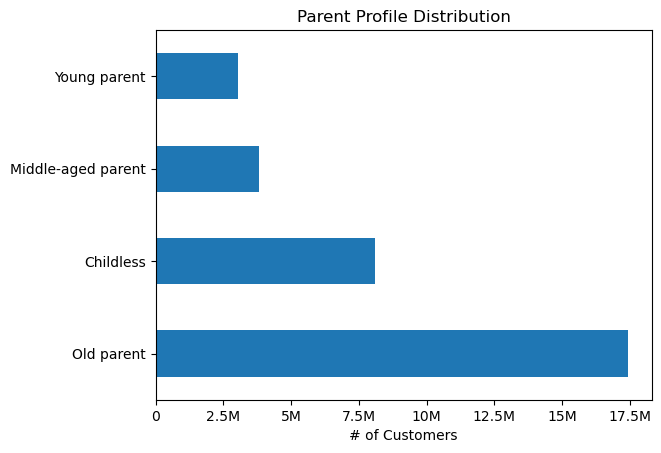

In [58]:
# generate bar chart to show distribution of 'parent_profile' column
freq_parent_profile = ords_prods_all['parent_profile'].value_counts().plot.barh()
plt.title('Parent Profile Distribution')
freq_parent_profile_labels_x = ['0', '2.5M', '5M', '7.5M', '10M', '12.5M', '15M', '17.5M', '20M']
plt.gca().set_xticklabels(freq_parent_profile_labels_x)
plt.xlabel('# of Customers')

In [59]:
# export chart
freq_parent_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_parent_profile.png'), bbox_inches = 'tight')

### USAGE FREQUENCY & EXPENDITURE

In [60]:
# summary stats for 'prices' & 'days_since_prior_order' grouped by 'parent_profile'
ords_prods_all.groupby('parent_profile').agg({'prices' : ['mean', 'min', 'max'],
                                              'days_since_prior_order' : ['mean', 'min', 'max']})

prices            days_since_prior_order           
                        mean  min   max                   mean  min   max
parent_profile                                                           
Childless           7.789915  1.0  25.0              11.080805  0.0  30.0
Middle-aged parent  7.783854  1.0  25.0              11.157574  0.0  30.0
Old parent          7.793185  1.0  25.0              11.113630  0.0  30.0
Young parent        7.789625  1.0  25.0              11.044198  0.0  30.0

### REGIONAL RELATIONSHIP


In [61]:
# generate crosstab between 'parent_profile' & 'region'
parent_region_crosstab = pd.crosstab(ords_prods_all['parent_profile'], ords_prods_all['region'])
parent_region_crosstab

region,Midwest,Northeast,South,West
parent_profile,,,,
Childless,1905200,1418301,2701659,2072343
Middle-aged parent,884744,676339,1282568,978906
Old parent,4091295,3096842,5779959,4469063
Young parent,716086,531254,1027699,772601


/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/3535324499.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bar_parent_region_labels_x)


Text(0.5, 0, '# of Customers')

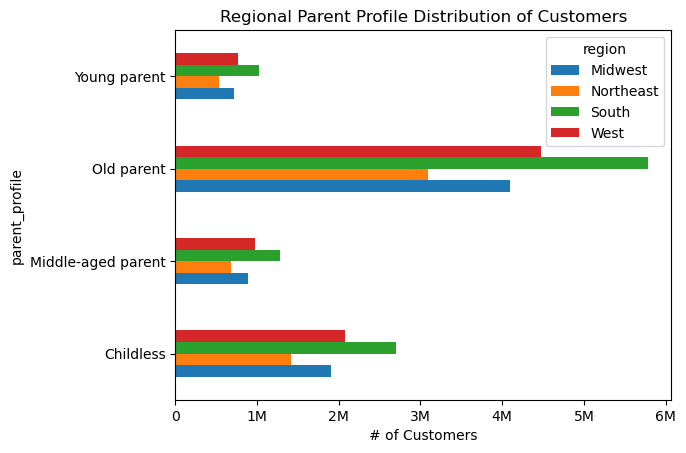

In [62]:
# generate a bar chart to visulize the relation between 'parent_profile' & 'region'
bar_parent_region = parent_region_crosstab.plot.barh()
plt.title('Regional Parent Profile Distribution of Customers')
bar_parent_region_labels_x = ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M']
plt.gca().set_xticklabels(bar_parent_region_labels_x)
plt.xlabel('# of Customers')

In [63]:
# export chart
bar_parent_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_parent_region.png'), bbox_inches = 'tight')

### DEPARTAMENTAL RELATIONSHIP

In [64]:
# generate crosstab between 'parent_profile' & 'department'
parent_dept_crosstab = pd.crosstab(index = ords_prods_all['department'], columns = ords_prods_all['parent_profile'], normalize = 'index')
parent_dept_crosstab

parent_profile,Childless,Middle-aged parent,Old parent,Young parent
department,,,,
alcohol,0.254515,0.120218,0.523820,0.101447
babies,0.251282,0.111927,0.543124,0.093666
bakery,0.251107,0.117650,0.537079,0.094164
beverages,0.250897,0.115930,0.540459,0.092715
breakfast,0.248320,0.118134,0.536426,0.097121
bulk,0.239435,0.121337,0.542736,0.096491
canned goods,0.247962,0.119173,0.538422,0.094442
dairy eggs,0.249940,0.119383,0.536235,0.094442
deli,0.252219,0.118287,0.535971,0.093523


([<matplotlib.axis.XTick at 0x4a22dda80>,
 [Text(0.0, 0, '0%'),
  Text(0.2, 0, '20%'),
  Text(0.4, 0, '40%'),
  Text(0.6, 0, '60%'),
  Text(0.8, 0, '80%'),
  Text(1.0, 0, '100%')])

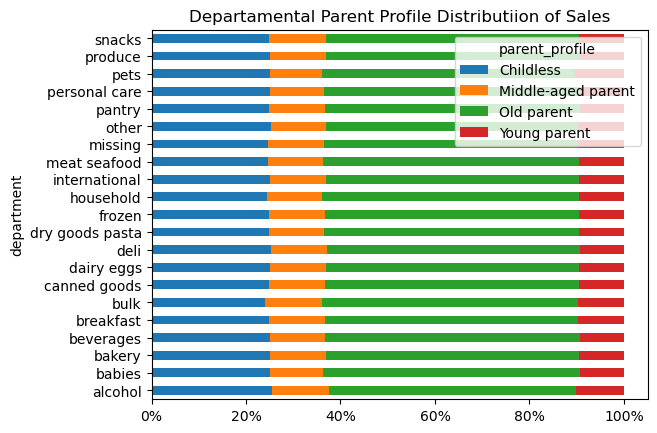

In [65]:
# generate stacked bar chart to visualize the relation between 'age_profile' and 'departments'
bar_parent_dept = parent_dept_crosstab.plot(kind = 'barh', stacked = True)
plt.title('Departamental Parent Profile Distributiion of Sales')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

In [66]:
# export chart
bar_parent_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_parent_dept.png'), bbox_inches = 'tight')

## INCOME

### CRITERIA

- If `'income'` is lower than $50,000, label customer as "Low income".
- If `'income'` is between $50,000 and $200,000, label customer as "Moderate income".
- If `'income'` is greater than $200,000, label customer as "High income".

In [67]:
# 1st conditional statement
ords_prods_all.loc[ords_prods_all['income'] < 50000, 'income_profile'] = 'Low income'

In [68]:
# 2nd conditional statement
ords_prods_all.loc[(ords_prods_all['income'] >= 50000) & (ords_prods_all['income'] <= 200000), 'income_profile'] = 'Moderate income'

In [69]:
# 3rd conditional statement
ords_prods_all.loc[ords_prods_all['income'] > 200000, 'income_profile'] = 'High-income'

In [70]:
# dataframe size
ords_prods_all.shape

(32404859, 36)

In [71]:
# frequency counts in 'income_flag'
ords_prods_all['income_profile'].value_counts(dropna = False)

Moderate income    28552333
Low income          3594083
High-income          258443
Name: income_profile, dtype: int64

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/4190417919.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(freq_income_profile_labels_x)


Text(0.5, 0, '# of Customers')

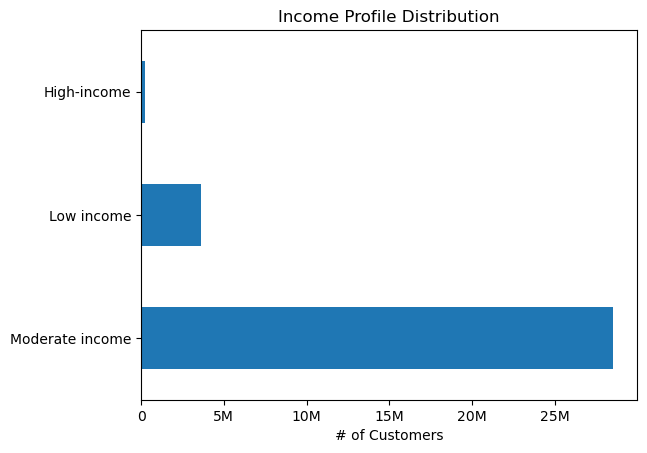

In [72]:
# generate bar chart to show distribution of 'income_profile' column
freq_income_profile = ords_prods_all['income_profile'].value_counts().plot.barh()
plt.title('Income Profile Distribution')
freq_income_profile_labels_x = ['0', '5M', '10M', '15M', '20M', '25M', '30M']
plt.gca().set_xticklabels(freq_income_profile_labels_x)
plt.xlabel('# of Customers')

In [73]:
# export chart
freq_income_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_income_profile.png'), bbox_inches = 'tight')

### USAGE FREQUENCY & EXPENDITURE

In [74]:
# summary stats for 'prices' & 'days_since_prior_order' grouped by 'income_profile'
ords_prods_all.groupby('income_profile').agg({'prices' : ['mean', 'min', 'max'],
                                              'days_since_prior_order' : ['mean', 'min', 'max']})

prices            days_since_prior_order           
                     mean  min   max                   mean  min   max
income_profile                                                        
High-income      7.772924  1.0  25.0              10.199644  0.0  30.0
Low income       6.696985  1.0  25.0              11.587220  0.0  30.0
Moderate income  7.928798  1.0  25.0              11.052231  0.0  30.0

### REGIONAL RELATIONSHIP


In [75]:
# generate crosstab between 'income' & 'region'
income_region_crosstab = pd.crosstab(ords_prods_all['income_profile'], ords_prods_all['region'])
income_region_crosstab

region,Midwest,Northeast,South,West
income_profile,,,,
High-income,65297,41127,84846,67173
Low income,838398,627256,1219460,908969
Moderate income,6693630,5054353,9487579,7316771


/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/2260037743.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bar_income_region_labels_x)


Text(0.5, 0, '# of Customers')

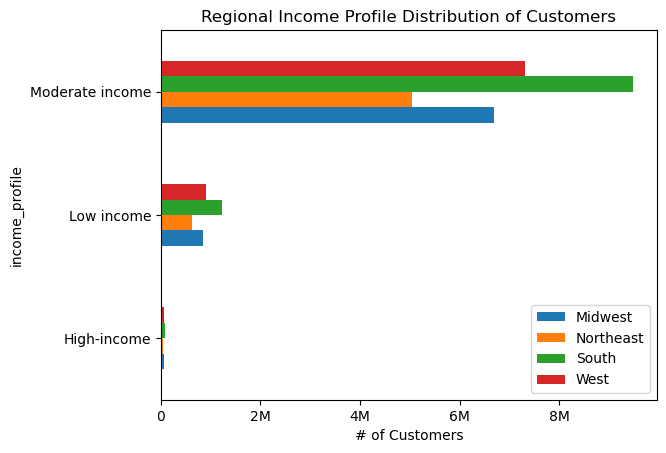

In [76]:
# generate a bar chart to visulize the relation between 'parent_profile' & 'region'
bar_income_region = income_region_crosstab.plot.barh()
plt.title('Regional Income Profile Distribution of Customers')
bar_income_region_labels_x = ['0', '2M', '4M', '6M', '8M', '10M']
plt.gca().set_xticklabels(bar_income_region_labels_x)
plt.legend(loc='lower right')
plt.xlabel('# of Customers')

In [77]:
# export chart
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_region.png'), bbox_inches = 'tight')

### DEPARTAMENTAL RELATIONSHIP

In [78]:
# generate crosstab between 'parent_profile' & 'department'
income_dept_crosstab = pd.crosstab(index = ords_prods_all['department'], columns = ords_prods_all['income_profile'], normalize = 'index')
income_dept_crosstab

income_profile,High-income,Low income,Moderate income
department,,,
alcohol,0.040339,0.128878,0.830783
babies,0.005073,0.072812,0.922115
bakery,0.010913,0.097839,0.891248
beverages,0.009285,0.150851,0.839865
breakfast,0.009418,0.138497,0.852085
bulk,0.000781,0.141411,0.857808
canned goods,0.008700,0.081130,0.910170
dairy eggs,0.008339,0.099112,0.892549
deli,0.007059,0.108534,0.884407


([<matplotlib.axis.XTick at 0x58fa76fe0>,
 [Text(0.0, 0, '0%'),
  Text(0.2, 0, '20%'),
  Text(0.4, 0, '40%'),
  Text(0.6, 0, '60%'),
  Text(0.8, 0, '80%'),
  Text(1.0, 0, '100%')])

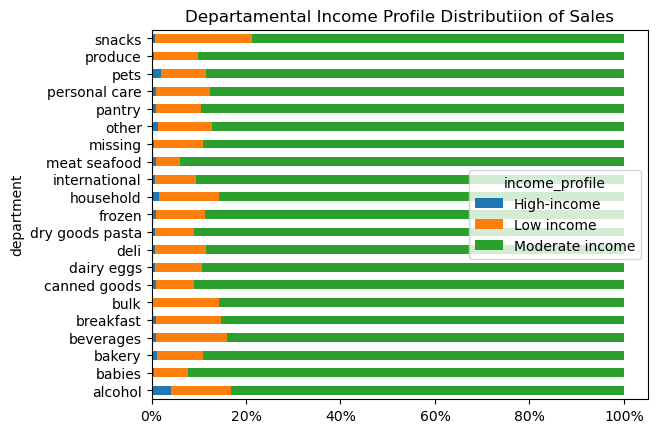

In [79]:
# generate stacked bar chart to visualize the relation between 'income_profile' & 'department'
bar_income_dept = income_dept_crosstab.plot(kind = 'barh', stacked = True)
plt.title('Departamental Income Profile Distributiion of Sales')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

In [80]:
# export chart
bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_income_dept.png'), bbox_inches = 'tight')

## MARITAL STATUS

In [81]:
# unique values in 'marital_status'
ords_prods_all['marital_status'].unique()

array(['married', 'divorced/widowed', 'single',
       'living with parents and siblings'], dtype=object)

### CRITERIA

- If `'marital_status'` is 'married', label customer as "Partnered adult".
- If `'marital_status'` is 'divorced/widowed', 'living with parents and siblings', **OR** 'single', label customer as "Single adult".

**NOTE:** There are no customers aged less than 18 in the dataset.

In [82]:
# 1st conditional statement
ords_prods_all.loc[ords_prods_all['marital_status'] == 'married', 'marital_profile'] = 'Partnered adult'

In [83]:
# 2nd conditional statement
ords_prods_all.loc[(ords_prods_all['marital_status'] == 'divorced/widowed') | (ords_prods_all['marital_status'] == 'living with parents and siblings') | (ords_prods_all['marital_status'] == 'single'), 'marital_profile'] = 'Single adult'

In [84]:
# dataframe size
ords_prods_all.shape

(32404859, 37)

In [85]:
# frequency counts in 'marital_profile'
ords_prods_all['marital_profile'].value_counts(dropna = False)

Partnered adult    22756753
Single adult        9648106
Name: marital_profile, dtype: int64

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/1764862928.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(freq_marital_profile_labels_x)


Text(0.5, 0, '# of Customers')

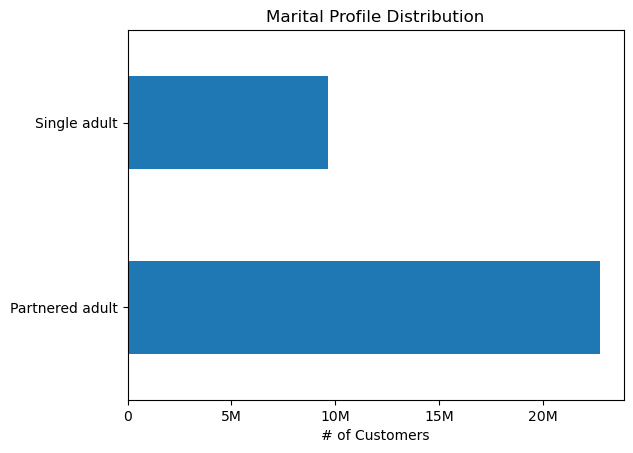

In [86]:
# generate bar chart to show distribution of 'marital_profile' column
freq_marital_profile = ords_prods_all['marital_profile'].value_counts().plot.barh()
plt.title('Marital Profile Distribution')
freq_marital_profile_labels_x = ['0', '5M', '10M', '15M', '20M', '25M']
plt.gca().set_xticklabels(freq_marital_profile_labels_x)
plt.xlabel('# of Customers')

In [87]:
# export chart
freq_marital_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_marital_profile,png'), bbox_inches = 'tight')

### USAGE FREQUENCY & EXPENDITURE

In [88]:
# summary stats for 'prices' & 'days_since_prior_order' grouped by 'marital_profile'
ords_prods_all.groupby('marital_profile').agg({'prices' : ['mean', 'min', 'max'],
                                              'days_since_prior_order' : ['mean', 'min', 'max']})

prices            days_since_prior_order           
                     mean  min   max                   mean  min   max
marital_profile                                                       
Partnered adult  7.790631  1.0  25.0              11.116175  0.0  30.0
Single adult     7.791642  1.0  25.0              11.075558  0.0  30.0

### REGIONAL RELATIONSHIP


In [89]:
# generate crosstab between 'income' & 'region'
marital_region_crosstab = pd.crosstab(ords_prods_all['marital_profile'], ords_prods_all['region'])
marital_region_crosstab

region,Midwest,Northeast,South,West
marital_profile,,,,
Partnered adult,5325608,4036321,7560642,5834182
Single adult,2271717,1686415,3231243,2458731


/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/3978809773.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bar_marital_region_labels_x)


Text(0.5, 0, '# of Customers')

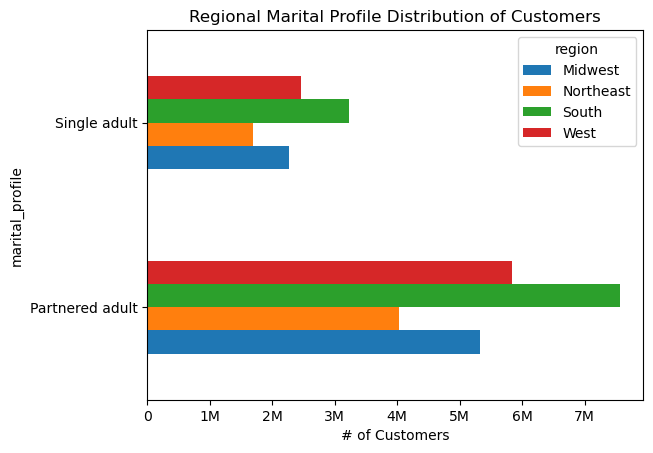

In [90]:
# generate a bar chart to visulize the relation between 'parent_profile' & 'region'
bar_marital_region = marital_region_crosstab.plot.barh()
plt.title('Regional Marital Profile Distribution of Customers')
bar_marital_region_labels_x = ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M', '8M']
plt.gca().set_xticklabels(bar_marital_region_labels_x)
plt.xlabel('# of Customers')

In [91]:
# export chart
bar_marital_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_marital_region.png'), bbox_inches = 'tight')

### DEPARTAMENTAL RELATIONSHIP

In [92]:
# generate crosstab between 'parent_profile' & 'department' (normalized)
marital_dept_crosstab = pd.crosstab(index = ords_prods_all['department'], columns = ords_prods_all['marital_profile'], normalize = 'index')
marital_dept_crosstab

marital_profile,Partnered adult,Single adult
department,,
alcohol,0.687604,0.312396
babies,0.701181,0.298819
bakery,0.701008,0.298992
beverages,0.702740,0.297260
breakfast,0.702279,0.297721
bulk,0.712145,0.287855
canned goods,0.704110,0.295890
dairy eggs,0.701755,0.298245
deli,0.699824,0.300176


([<matplotlib.axis.XTick at 0x5cdc71e10>,
 [Text(0.0, 0, '0%'),
  Text(0.2, 0, '20%'),
  Text(0.4, 0, '40%'),
  Text(0.6, 0, '60%'),
  Text(0.8, 0, '80%'),
  Text(1.0, 0, '100%')])

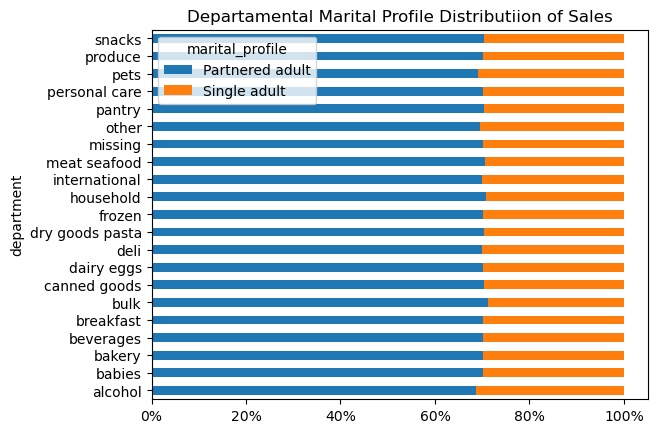

In [93]:
# generate stacked bar chart to visualize the relation between 'marital_profile' & 'department'
bar_marital_dept = marital_dept_crosstab.plot(kind = 'barh', stacked = True)
plt.title('Departamental Marital Profile Distributiion of Sales')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

In [94]:
# export chart
bar_marital_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_marital_dept.png'), bbox_inches = 'tight')

## DIETARY PREFERENCES

In [95]:
# assign labels to values in 'user_dept_crosstab' & store them in 'diet_dict' dictionary
diet_dict = dict()
for user in user_dept_crosstab:
    workinglist = user_dept_crosstab[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:
        diet_dict[user] = 'Vegan'
    elif workinglist[11] == 0:
        diet_dict[user] = 'Vegetarian'
    else:
        diet_dict[user] = 'Meat-consumer'

In [96]:
# assign values in 'diet_dict' dictionary to 'diet_list' list
diet_list = []

for user in ords_prods_all['user_id']:
    diet_list.append(diet_dict[user])

In [97]:
# add values in 'diet_list' list to dataframe as new column
ords_prods_all['diet_profile'] = diet_list

In [98]:
# dataframe size
ords_prods_all.shape

(32404859, 38)

In [99]:
# frequency counts in 'diet_profile'
ords_prods_all['diet_profile'].value_counts()

Meat-consumer    23762619
Vegetarian        8258813
Vegan              383427
Name: diet_profile, dtype: int64

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/311579576.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(freq_diet_profile_labels_x)


Text(0.5, 0, '# of Customers')

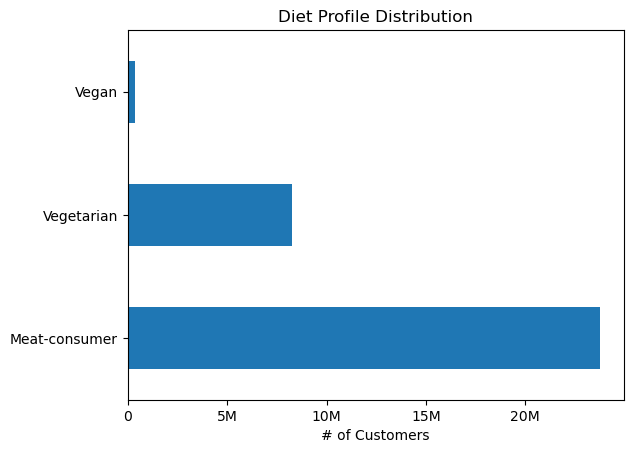

In [100]:
# generate bar chart to show distribution of 'diet_profile' column
freq_diet_profile = ords_prods_all['diet_profile'].value_counts().plot.barh()
plt.title('Diet Profile Distribution')
freq_diet_profile_labels_x = ['0', '5M', '10M', '15M', '20M', '25M']
plt.gca().set_xticklabels(freq_diet_profile_labels_x)
plt.xlabel('# of Customers')

In [101]:
# export chart
freq_diet_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_diet_profile.png'), bbox_inches = 'tight')

### USAGE FREQUENCY & EXPENDITURE

In [102]:
# summary stats for 'prices' & 'days_since_prior_order' grouped by 'diet_profile'
ords_prods_all.groupby('diet_profile').agg({'prices' : ['mean', 'min', 'max'],
                                            'days_since_prior_order' : ['mean', 'min', 'max']})

prices            days_since_prior_order           
                   mean  min   max                   mean  min   max
diet_profile                                                        
Meat-consumer  7.905871  1.0  25.0              10.762605  0.0  30.0
Vegan          7.009920  1.0  20.0              14.749275  0.0  30.0
Vegetarian     7.496485  1.0  20.0              11.952600  0.0  30.0

### REGIONAL RELATIONSHIP


In [103]:
# generate crosstab between 'income' & 'region'
diet_region_crosstab = pd.crosstab(ords_prods_all['diet_profile'], ords_prods_all['region'])
diet_region_crosstab

region,Midwest,Northeast,South,West
diet_profile,,,,
Meat-consumer,5552184,4201008,7914729,6094698
Vegan,90293,67764,125305,100065
Vegetarian,1954848,1453964,2751851,2098150


/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/1878311652.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bar_diet_region_labels_x)


Text(0.5, 0, '# of Customers')

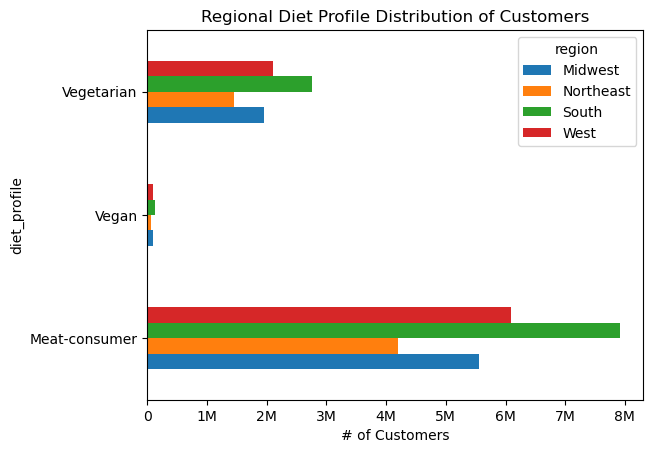

In [104]:
# generate a bar chart to visulize the relation between 'parent_profile' & 'region'
bar_diet_region = diet_region_crosstab.plot.barh()
plt.title('Regional Diet Profile Distribution of Customers')
bar_diet_region_labels_x = ['0', '1M', '2M', '3M', '4M', '5M', '6M', '7M', '8M', '9M']
plt.gca().set_xticklabels(bar_diet_region_labels_x)
plt.xlabel('# of Customers')

In [105]:
# export chart
bar_diet_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_region.png'), bbox_inches = 'tight')

### DEPARTAMENTAL RELATIONSHIP

In [106]:
# generate crosstab between 'parent_profile' & 'department'
diet_dept_crosstab = pd.crosstab(index = ords_prods_all['department'], columns = ords_prods_all['diet_profile'], normalize = 'index')
diet_dept_crosstab

diet_profile,Meat-consumer,Vegan,Vegetarian
department,,,
alcohol,0.543560,0.085897,0.370543
babies,0.812611,0.005470,0.181920
bakery,0.760923,0.005875,0.233202
beverages,0.634143,0.027626,0.338231
breakfast,0.676857,0.011597,0.311546
bulk,0.655396,0.019408,0.325196
canned goods,0.790944,0.006191,0.202865
dairy eggs,0.731233,0.000000,0.268767
deli,0.742847,0.006860,0.250293


([<matplotlib.axis.XTick at 0x2cef38f40>,
 [Text(0.0, 0, '0%'),
  Text(0.2, 0, '20%'),
  Text(0.4, 0, '40%'),
  Text(0.6, 0, '60%'),
  Text(0.8, 0, '80%'),
  Text(1.0, 0, '100%')])

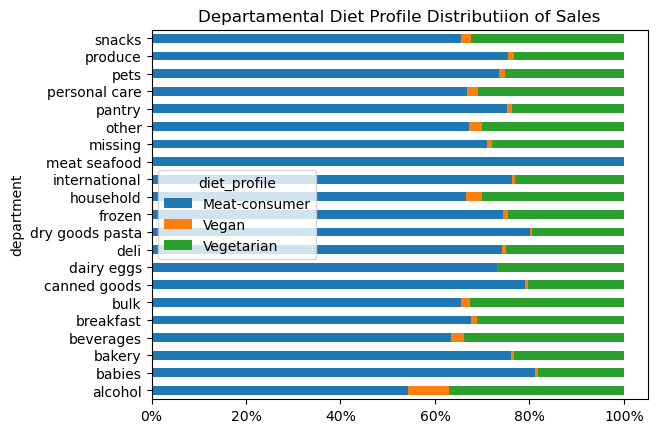

In [107]:
# generata stacked bar chart to visualize the relation between 'diet_profile' & 'department'
bar_diet_dept = diet_dept_crosstab.plot(kind = 'barh', stacked = True)
plt.title('Departamental Diet Profile Distributiion of Sales')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

In [108]:
# export chart
bar_diet_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_diet_dept.png'), bbox_inches = 'tight')

## PET OWNERSHIP

In [109]:
# assign labels to values in 'diet_crosstab' & store them in 'pet_dict' dictionary
pet_dict = dict()
for user in user_dept_crosstab:
    workinglist = user_dept_crosstab[user].tolist()
    if workinglist[7] == 0 :
        pet_dict[user] = 'Non-pet owner'
    else:
        pet_dict[user] = 'Pet owner'

In [110]:
# assign values in 'pet_dict' dictionary to 'pet_list' list
pet_list = []
for user in ords_prods_all['user_id']:
    pet_list.append(pet_dict[user])

In [111]:
# add values in 'pet_list' list to dataframe as new column
ords_prods_all['pets_profile'] = pet_list

In [112]:
# dataframe size
ords_prods_all.shape

(32404859, 39)

In [113]:
# frequency counts in 'pets_profile'
ords_prods_all['pets_profile'].value_counts()

Non-pet owner    28876718
Pet owner         3528141
Name: pets_profile, dtype: int64

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/1186593832.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(freq_pets_profile_labels_x)


Text(0.5, 0, '# of Customers')

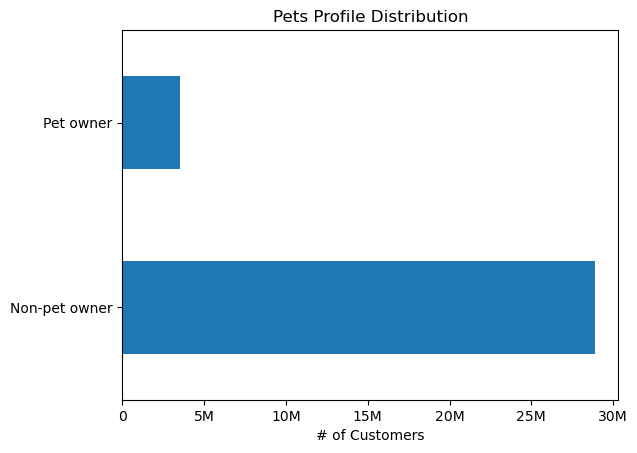

In [114]:
# generate bar chart to show distribution of 'pets_profile' column
freq_pets_profile = ords_prods_all['pets_profile'].value_counts().plot.barh()
plt.title('Pets Profile Distribution')
freq_pets_profile_labels_x = ['0', '5M', '10M', '15M', '20M', '25M', '30M', '35M']
plt.gca().set_xticklabels(freq_pets_profile_labels_x)
plt.xlabel('# of Customers')

In [115]:
# export chart
freq_pets_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'freq_pets_profile.png'), bbox_inches = 'tight')

### USAGE FREQUENCY & EXPENDITURE

In [116]:
# summary stats for 'prices' & 'days_since_prior_order' grouped by 'pets_profile'
ords_prods_all.groupby('pets_profile').agg({'prices' : ['mean', 'min', 'max'],
                                            'days_since_prior_order' : ['mean', 'min', 'max']})

prices            days_since_prior_order           
                   mean  min   max                   mean  min   max
pets_profile                                                        
Non-pet owner  7.788304  1.0  25.0              11.200417  0.0  30.0
Pet owner      7.812441  1.0  25.0              10.327303  0.0  30.0

### REGIONAL RELATIONSHIP


In [117]:
# generate crosstab between 'income' & 'region'
pets_region_crosstab = pd.crosstab(ords_prods_all['pets_profile'], ords_prods_all['region'])
pets_region_crosstab

region,Midwest,Northeast,South,West
pets_profile,,,,
Non-pet owner,6752777,5110297,9650143,7363501
Pet owner,844548,612439,1141742,929412


/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/3559725911.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bar_pets_region_labels_x)


Text(0.5, 0, '# of Customers')

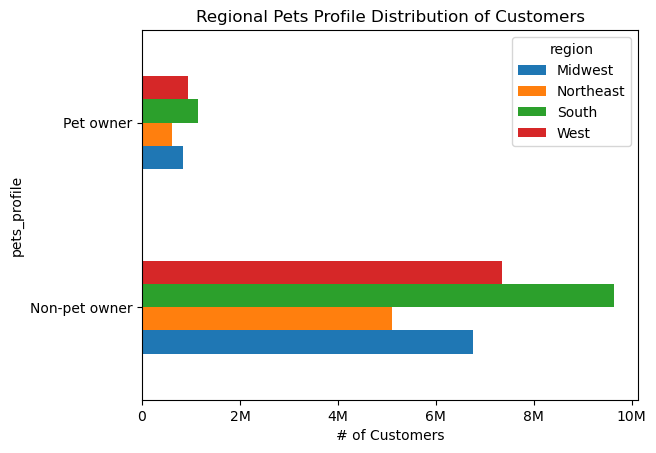

In [118]:
# generate a bar chart to visulize the relation between 'parent_profile' & 'region'
bar_pets_region = pets_region_crosstab.plot.barh()
plt.title('Regional Pets Profile Distribution of Customers')
bar_pets_region_labels_x = ['0', '2M', '4M', '6M', '8M', '10M', '12M']
plt.gca().set_xticklabels(bar_pets_region_labels_x)
plt.xlabel('# of Customers')

In [119]:
# export chart
bar_pets_region.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pets_region.png'), bbox_inches = 'tight')

### DEPARTAMENTAL RELATIONSHIP

In [120]:
# generate crosstab between 'parent_profile' & 'department'
pets_dept_crosstab = pd.crosstab(index = ords_prods_all['department'], columns = ords_prods_all['pets_profile'], normalize = 'index')
pets_dept_crosstab

pets_profile,Non-pet owner,Pet owner
department,,
alcohol,0.822702,0.177298
babies,0.914403,0.085597
bakery,0.879959,0.120041
beverages,0.878692,0.121308
breakfast,0.891988,0.108012
bulk,0.938160,0.061840
canned goods,0.879060,0.120940
dairy eggs,0.900951,0.099049
deli,0.893668,0.106332


([<matplotlib.axis.XTick at 0x2cf1a7640>,
 [Text(0.0, 0, '0%'),
  Text(0.2, 0, '20%'),
  Text(0.4, 0, '40%'),
  Text(0.6, 0, '60%'),
  Text(0.8, 0, '80%'),
  Text(1.0, 0, '100%')])

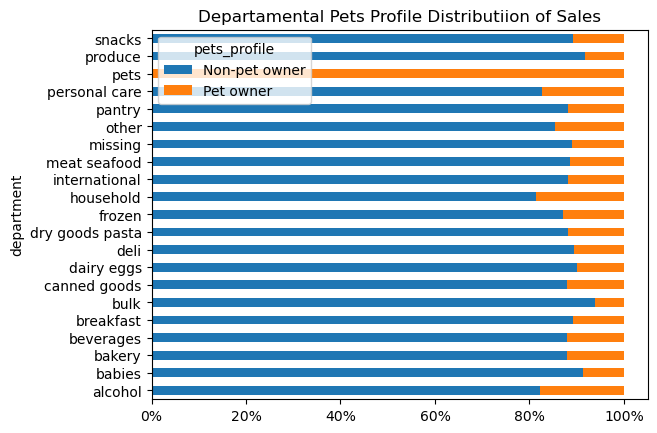

In [121]:
# generate stacked bar chart to visualize the relation between 'pets_profile' & 'department'
bar_pets_dept = pets_dept_crosstab.plot(kind = 'barh', stacked = True)
plt.title('Departamental Pets Profile Distributiion of Sales')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

In [122]:
# export chart
bar_pets_dept.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_pets_dept.png'), bbox_inches = 'tight')

# CONSUMER PREFERENCES BY DEPARTMENT

/var/folders/8p/sqjxls112c90qnpl3cdf34x00000gn/T/ipykernel_55674/3358715409.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(bar_dept_order_labels_x)


Text(0, 0.5, 'department')

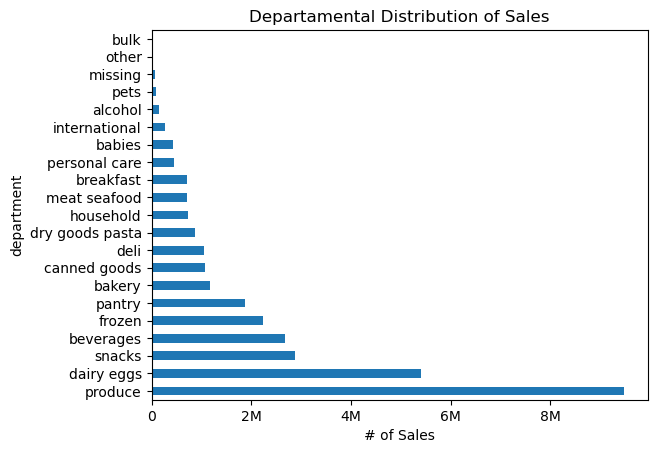

In [123]:
# generate bar chart based on frequency counts in 'department'
bar_dept_order = ords_prods_all['department'].value_counts().plot.barh()
plt.title('Departamental Distribution of Sales')
bar_dept_order_labels_x = ['0', '2M', '4M', '6M', '8M', '10M']
plt.gca().set_xticklabels(bar_dept_order_labels_x)
plt.xlabel('# of Sales')
plt.ylabel('department')

In [124]:
# export data
bar_dept_order.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_dept_order.png'), bbox_inches = 'tight')

# ORDERING HABITS BY LOYALTY STATUS

In [125]:
# generate a crosstab between 'department' & 'loyalty_flag'
loyal_depts_crosstab = pd.crosstab(index = ords_prods_all['department'], columns = ords_prods_all['loyalty_flag'], normalize = 'index')
loyal_depts_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
department,,,
alcohol,0.251945,0.245276,0.502778
babies,0.394307,0.141854,0.463839
bakery,0.324005,0.190804,0.485191
beverages,0.318072,0.190791,0.491136
breakfast,0.315173,0.196807,0.488020
bulk,0.400139,0.152460,0.447401
canned goods,0.275822,0.221130,0.503048
dairy eggs,0.339098,0.179972,0.480930
deli,0.308249,0.195720,0.496032


([<matplotlib.axis.XTick at 0x2cf387130>,
 [Text(0.0, 0, '0%'),
  Text(0.2, 0, '20%'),
  Text(0.4, 0, '40%'),
  Text(0.6, 0, '60%'),
  Text(0.8, 0, '80%'),
  Text(1.0, 0, '100%')])

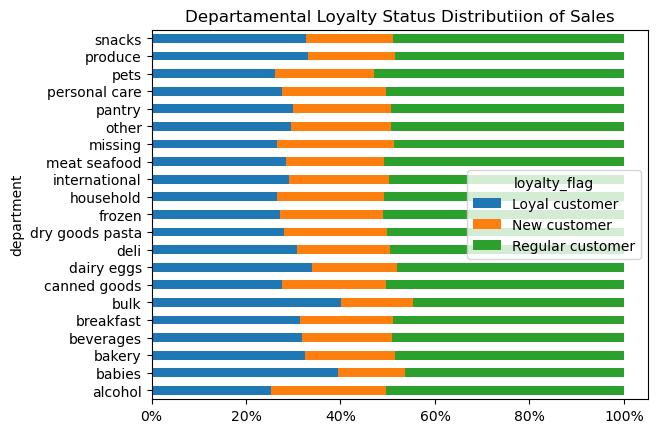

In [126]:
# generate stacked bar chart based on frequency counts in 'department' grouped by 'loyalty_flag'
bar_loyal_depts = loyal_depts_crosstab.plot(kind = 'barh', stacked = True, )
plt.title('Departamental Loyalty Status Distributiion of Sales')
plt.xticks([0.0, 0.2, 0.4, 0.6, 0.8, 1.0], ['0%', '20%', '40%', '60%', '80%', '100%'])

In [127]:
# export chart
bar_loyal_depts.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_loyal_depts.png'), bbox_inches = 'tight')

# EXPORTING DATA

In [ ]:
# export final dataframe as pickle
ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'g_orders_products_final.pkl'))
ords_prods_all_recur_act.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'g_orders_products_optimized.pkl'))